### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
df_arbitrum = pd.read_csv('arbitrum_clean_data.csv', index_col=0)
df_arbitrum['blockchain'] = 'arbitrum'

df_bsc = pd.read_csv('bsc_clean_data.csv', index_col=0)
df_bsc['blockchain'] = 'bsc'

df_etherium = pd.read_csv('etherium_clean_data.csv', index_col=0)
df_etherium['blockchain'] = 'etherium'

df_fantom = pd.read_csv('fantom_clean_data.csv', index_col=0)
df_fantom['blockchain'] = 'fantom'

df_polygon = pd.read_csv('polygon_clean_data.csv', index_col=0)
df_polygon['blockchain'] = 'polygon'

### Convert time columns to datetime

In [3]:
df = pd.concat([df_arbitrum, df_bsc, df_etherium, df_fantom, df_polygon], ignore_index=True)
print("Combined DataFrame shape:", df.shape)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

Combined DataFrame shape: (32691, 8)


### Make new features

In [4]:
df['activity_duration'] = (df['end_time'] - df['start_time']).dt.days
df['num_transactions'] = df['end_nonce'] - df['start_nonce']
df['num_transactions'] = df['num_transactions'].replace(0, 1)
df['avg_eth_per_tx'] = df['total_eth_sent'] / df['num_transactions']

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

### Analyze user behavior patterns and categorize users

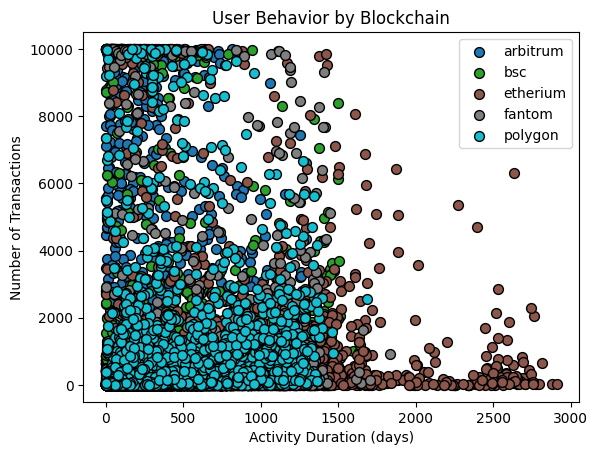

In [5]:
blockchains = df['blockchain'].unique()
colors = plt.colormaps.get_cmap('tab10').resampled(len(blockchains))

for idx, blockchain in enumerate(blockchains):
    subset = df[df['blockchain'] == blockchain]
    plt.scatter(subset['activity_duration'], subset['num_transactions'], color=colors(idx),
                label=blockchain, edgecolor='k', s=50)

plt.xlabel('Activity Duration (days)')
plt.ylabel('Number of Transactions')
plt.title('User Behavior by Blockchain')
plt.legend()
plt.show()

#### Number of transactions vs Total eth sent

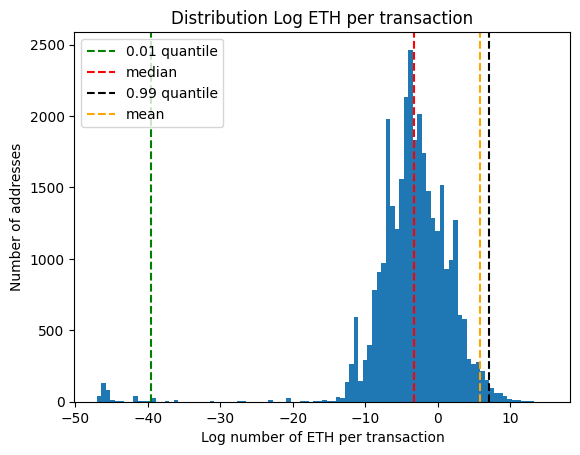

In [6]:
eth_per_tx = np.array((df.total_eth_sent / df["num_transactions"]))
log_quantile, log_mean = np.log(np.quantile(eth_per_tx, q=[0.01, 0.5, 0.99])), np.log(eth_per_tx.mean())


plt.hist(np.log(eth_per_tx), bins=100)
plt.title("Distribution Log ETH per transaction")
plt.ylabel("Number of addresses")
plt.axvline(x=log_quantile[0], color='green', linestyle='--', label="0.01 quantile")
plt.axvline(x=log_quantile[1], color='red', linestyle='--', label="median")
plt.axvline(x=log_quantile[2], color='black', linestyle='--', label="0.99 quantile")
plt.axvline(x=log_mean, color='orange', linestyle='--', label="mean")
plt.xlabel("Log number of ETH per transaction")
plt.legend()
plt.show()